# Analyse des données de ventes de produits

In [1]:
#importer les packages

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Récupérer les fichiers de données

path="/home/nes/MesDocuments/Data Science/Data Analyis/Mini_projet/Ventes de produits/Sales_Data/"

files=[file for file in os.listdir(path)]
for file in files:
    print(file)

Sales_September_2019.csv
Sales_August_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv
Sales_November_2019.csv
new.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_July_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv


In [3]:
#Créer une base de données vide
all_Data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+file)
    all_Data=pd.concat([all_Data,current_data])
print(all_Data)


#pour convertir ce nouveau dataFrame en fichier csv
#all_Data.to_csv(path+'all_Data.csv')

      Order ID                   Product Quantity Ordered Price Each  \
0       248151     AA Batteries (4-pack)                4       3.84   
1       248152      USB-C Charging Cable                2      11.95   
2       248153      USB-C Charging Cable                1      11.95   
3       248154          27in FHD Monitor                1     149.99   
4       248155      USB-C Charging Cable                1      11.95   
...        ...                       ...              ...        ...   
15221   176554  Lightning Charging Cable                1      14.95   
15222   176555          27in FHD Monitor                1     149.99   
15223   176556    AAA Batteries (4-pack)                3       2.99   
15224   176557                    iPhone                1        700   
15225   176557  Lightning Charging Cable                1      14.95   

           Order Date                           Purchase Address  Unnamed: 0  
0      09/17/19 14:44        380 North St, Los Angeles, 

In [4]:
all_Data.shape

(373700, 7)

In [5]:
all_Data.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
Unnamed: 0          float64
dtype: object

In [6]:
all_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",NaN
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",NaN
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",NaN
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",NaN
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",NaN


In [7]:
#Afficher le nombre de valeurs manquantes par variables

all_Data.isnull().sum()

Order ID              1090
Product               1090
Quantity Ordered      1090
Price Each            1090
Order Date            1090
Purchase Address      1090
Unnamed: 0          186850
dtype: int64

In [4]:
#Supprimer les valeurs manquantes

all_Data=all_Data.dropna()
all_Data.shape

(186305, 7)

# Quel est le mois durant lequel on a réalisé le meilleurs chiffre d'affaire

In [5]:
#Etape 1 : Extraire les mois de la variable data_order

#créer une fonction month
def monthy(m):
    return str(m).split('/')[0]

#"exemple"
#month('12/30/19 00:01')

In [10]:
all_Data.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
Unnamed: 0          float64
dtype: object

In [6]:
#Création d'une nouvelle colonne 'Month'
all_Data['Month']=all_Data['Order Date'].apply(monthy)

all_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",0.0,09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",1.0,09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",2.0,09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",3.0,09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",4.0,09
...,...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",15221.0,03
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",15222.0,03
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",15223.0,03
186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",15224.0,03


In [12]:
all_Data['Month'].unique()

array(['09', '10', 'Order Date', '08', '02', '03', '04', '05', '06', '07',
       '12', '01', '11'], dtype=object)

In [7]:
#Filtter la liste des mois pour ne garder que les mois
all_Data=all_Data[all_Data['Month']!='Order Date']
all_Data=all_Data[all_Data['Month']!='nan']
all_Data['Month'].unique()

array(['09', '10', '08', '02', '03', '04', '05', '06', '07', '12', '01',
       '11'], dtype=object)

In [14]:
#changer le type de la variable 'Month' en int

all_Data['Month']=all_Data['Month'].astype(int)

#vérification
all_Data.dtypes


Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
Unnamed: 0          float64
Month                 int64
dtype: object

In [9]:
all_Data['Price Each']=all_Data['Price Each'].astype(float)  #prix unitaire

all_Data['Quantity Ordered']=all_Data['Quantity Ordered'].astype(int)    #quantité

#vérification
all_Data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Unnamed: 0          float64
Month                object
dtype: object

In [10]:
# Création d'une nouvelle variable chiffre d'affaire 'Sales'
all_Data['Sales']=all_Data['Quantity Ordered']*all_Data['Price Each']
all_Data['Sales']

0          15.36
1          23.90
2          11.95
3         149.99
4          11.95
           ...  
186845     14.95
186846    149.99
186847      8.97
186848    700.00
186849     14.95
Name: Sales, Length: 185950, dtype: float64

In [17]:
all_Data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [18]:
#Nombre total de ventes
all_Data.groupby('Month')['Sales'].sum().sum()

34492035.97

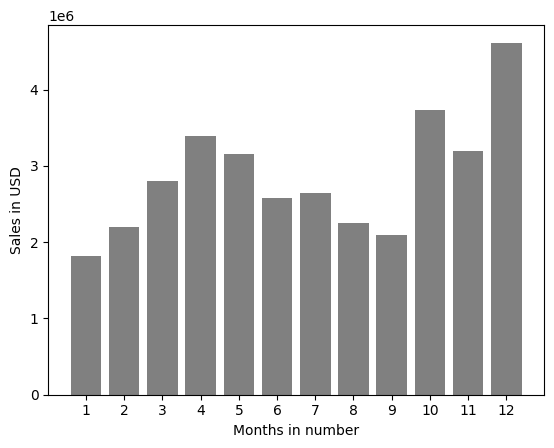

In [19]:
months=range(1,13)
plt.bar(months,all_Data.groupby('Month')['Sales'].sum(),color='gray')
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months in number')
plt.show()

Le mois avec le meilleurs chiffre d'affaire est le mois de décembre (12) probablement à cause des fêtes de fin d'année

# Quel ville a réalisé le meilleur chiffre d'affaire

In [20]:
# Création d'une fonction pour extraire l'info "Ville"

def city(x):
    return x.split(',')[1]

#Exemple Purchase Address : x='136 Churn St,New York city, NY 10001'
#x.split(',')[1]==> New York city

In [21]:
all_Data['city']=all_Data['Purchase Address'].apply(city)
all_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,city
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",0.0,9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",1.0,9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",2.0,9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",3.0,9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",4.0,9,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",15221.0,3,14.95,San Francisco
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",15222.0,3,149.99,San Francisco
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",15223.0,3,8.97,Los Angeles
186848,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",15224.0,3,700.00,San Francisco


In [22]:
all_Data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

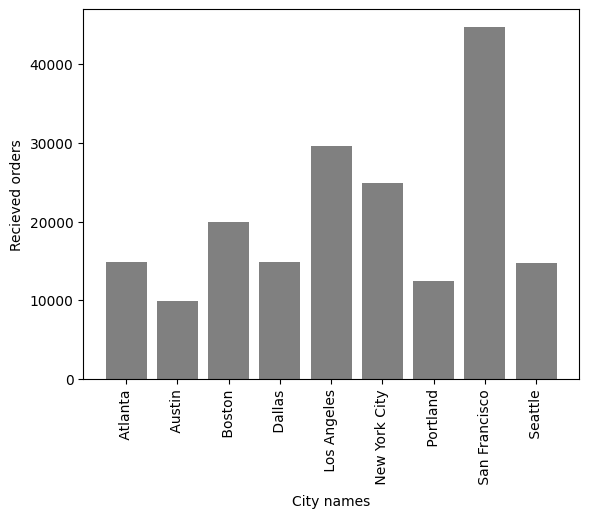

In [23]:
plt.bar(all_Data.groupby('city')['city'].count().index,all_Data.groupby('city')['city'].count().values,color='gray')
plt.xticks(rotation = 'vertical')
plt.ylabel('Recieved orders')
plt.xlabel('City names')
plt.show()

# Quand es ce que on peut mener une compagne publicitaire pour réaliser plus de commande

In [24]:
# on va s'untérésser à l'heure des commandes

all_Data['Hour']= pd.to_datetime(all_Data['Order Date']).dt.hour   

/tmp/ipykernel_13409/4292459227.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_Data['Hour']= pd.to_datetime(all_Data['Order Date']).dt.hour


In [25]:
all_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,city,Hour
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",0.0,9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",1.0,9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",2.0,9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",3.0,9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",4.0,9,11.95,Atlanta,19
...,...,...,...,...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",15221.0,3,14.95,San Francisco,11
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",15222.0,3,149.99,San Francisco,20
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",15223.0,3,8.97,Los Angeles,10
186848,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",15224.0,3,700.00,San Francisco,12


In [26]:
hours=[] #les heures
nbCommand=[] #nb commandes par heure

for hour,total in all_Data.groupby('Hour'):
    hours.append(hour)
    nbCommand.append(len(total))
    
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

Text(0, 0.5, 'Nombre de commandes')

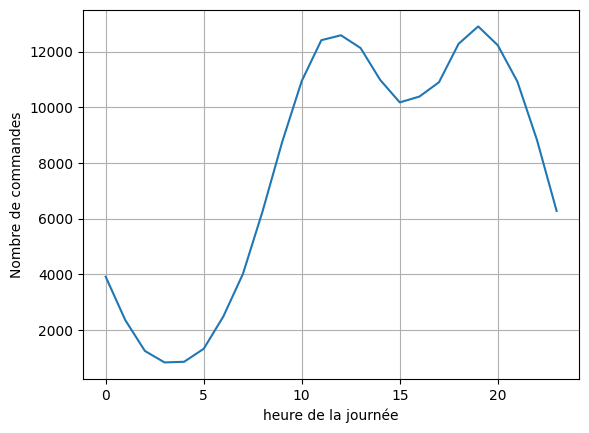

In [27]:
plt.grid()
plt.plot(hours,nbCommand)
plt.xlabel('heure de la journée')
plt.ylabel('Nombre de commandes')

Le moment où il y a plus de commande c'est entre 12h00 et 19h00 --> Ce sont les meilleurs créneaux pour lancer une compagne publicitaire

# Quel produit se vend le plus 

<Axes: xlabel='Product'>

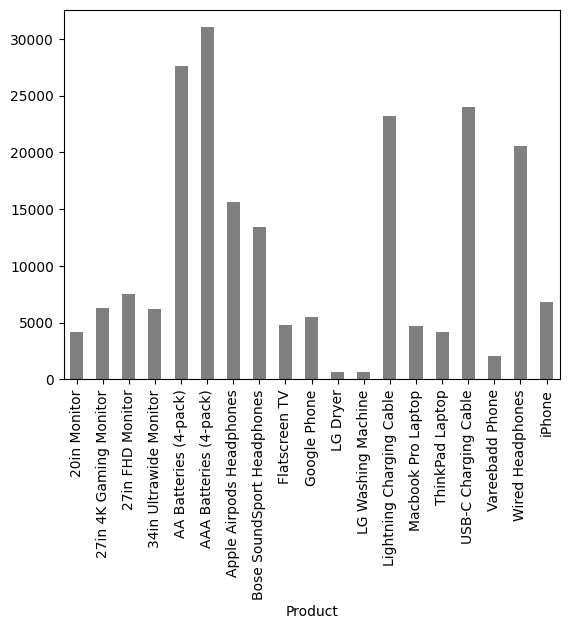

In [28]:
all_Data.groupby('Product')['Quantity Ordered'].sum().plot(kind ='bar',color='gray')

## On va essayer de comprendre pourquoi certains produits se vendent plus que d'autres

### 1) Etudier l'impact des prix sur la vente

In [29]:
#calculer le prix moyen pour chaque produits (on prends en compte le prix moyen car parfois il y a des promos)

all_Data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Effectivement, on constate que les deux produits qui se vendent le plus sont également les moins chères dans ce magasin.

/tmp/ipykernel_13409/4289169731.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

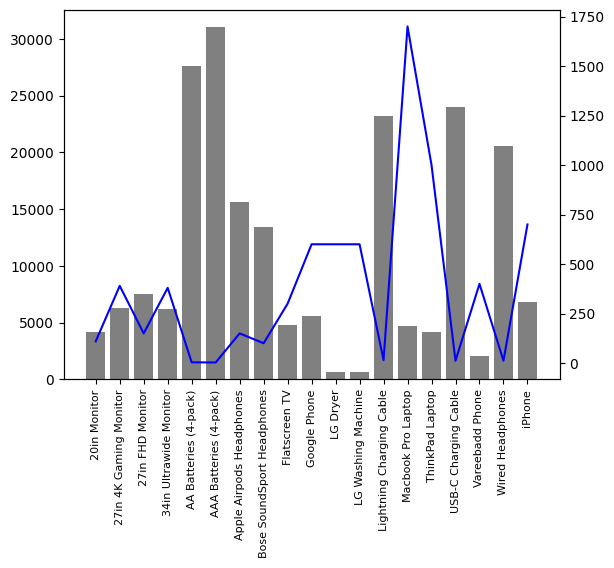

In [30]:
# On va créer un visuel qui représente le prix vs quantité vendu pour chaque produit

products=all_Data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_Data.groupby('Product')['Quantity Ordered'].sum()
prices=all_Data.groupby('Product')['Price Each'].mean()

plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(products,quantity,color='gray')
ax2.plot(products,prices,'b-')

ax1.set_xticklabels(products,rotation='vertical',size=8)

# Quels sont les combinaisons de produits qui se vendent le plus

In [21]:
#Trouver  les articles acheter ensemble --> ils ont le même Order ID
#on cherche uniquement les éléments qui sont dupliqués (même Order ID)

df=all_Data[all_Data['Order ID'].duplicated(keep=False)] #on ne supprime pas les doublons

df.sort_values(by=['Order ID'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales
161942,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",41.0,01,11.95
161943,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",42.0,01,11.99
161959,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",58.0,01,11.52
161958,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",57.0,01,150.00
162035,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",134.0,01,11.99
...,...,...,...,...,...,...,...,...,...
92766,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",25028.0,12,11.99
92778,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",25040.0,12,700.00
92779,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",25041.0,12,14.95
92814,319631,34in Ultrawide Monitor,1,379.99,12/17/19 22:35,"363 Highland St, Austin, TX 73301",25076.0,12,379.99


In [26]:
#grouper les produits --> en cherchant ceux qui ont étaient commandés en mm tps

#df['Frequence']= df1.groupby(['Order ID','Product']).count()
df2=df
df2['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(list(set(x))))

#df2.sort_values(by=['Frequence'])
df2


/tmp/ipykernel_13890/1138007103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(list(set(x))))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,Grouped
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",20.0,09,11.95,USB-C Charging Cable
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",21.0,09,11.95,USB-C Charging Cable
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",60.0,09,700.00,"Lightning Charging Cable,iPhone"
61,248210,Lightning Charging Cable,1,14.95,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",61.0,09,14.95,"Lightning Charging Cable,iPhone"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",70.0,09,99.99,"Google Phone,Bose SoundSport Headphones"
...,...,...,...,...,...,...,...,...,...,...
186777,176487,Lightning Charging Cable,1,14.95,03/14/19 14:46,"92 Johnson St, Los Angeles, CA 90001",15153.0,03,14.95,"Lightning Charging Cable,iPhone"
186827,176537,Apple Airpods Headphones,1,150.00,03/12/19 07:33,"80 Church St, Austin, TX 73301",15203.0,03,150.00,Apple Airpods Headphones
186828,176537,Apple Airpods Headphones,1,150.00,03/12/19 07:33,"80 Church St, Austin, TX 73301",15204.0,03,150.00,Apple Airpods Headphones
186848,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",15224.0,03,700.00,"Lightning Charging Cable,iPhone"


In [29]:
#supprimer les groupes doublons
df2=df.drop_duplicates(subset=['Order ID'])

df2['FR']=df2.groupby('Grouped')['Grouped'].transform('size')
df2=df2.drop_duplicates(subset=['Grouped'])
df3=df2.sort_values(by=['FR'],ascending=False)
df3

/tmp/ipykernel_13890/87255655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FR']=df2.groupby('Grouped')['Grouped'].transform('size')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,Grouped,FR
60,248210,iPhone,1,700.0,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",60.0,09,700.0,"Lightning Charging Cable,iPhone",895
759,248885,Google Phone,1,600.0,09/15/19 23:41,"637 Cedar St, Dallas, TX 75001",759.0,09,600.0,"USB-C Charging Cable,Google Phone",869
1274,249380,iPhone,1,700.0,09/28/19 19:16,"976 5th St, Los Angeles, CA 90001",1274.0,09,700.0,"iPhone,Wired Headphones",374
544,248679,Vareebadd Phone,1,400.0,09/15/19 11:04,"47 Meadow St, San Francisco, CA 94016",544.0,09,400.0,"Vareebadd Phone,USB-C Charging Cable",318
777,248901,Google Phone,1,600.0,09/24/19 08:11,"626 5th St, Los Angeles, CA 90001",777.0,09,600.0,"Google Phone,Wired Headphones",311
...,...,...,...,...,...,...,...,...,...,...,...
108392,293647,iPhone,1,700.0,11/20/19 07:49,"900 Willow St, Atlanta, GA 30301",15537.0,11,700.0,"Lightning Charging Cable,iPhone,AAA Batteries ...",1
110684,194253,iPhone,1,700.0,05/07/19 09:42,"108 Adams St, Austin, TX 73301",168.0,05,700.0,"Lightning Charging Cable,USB-C Charging Cable,...",1
24501,151270,LG Washing Machine,1,600.0,02/20/19 15:29,"634 Walnut St, Dallas, TX 75001",804.0,02,600.0,"LG Washing Machine,Google Phone",1
112358,195832,iPhone,1,700.0,05/16/19 23:49,"973 River St, Boston, MA 02215",1842.0,05,700.0,"Google Phone,iPhone",1


<Axes: ylabel='count'>

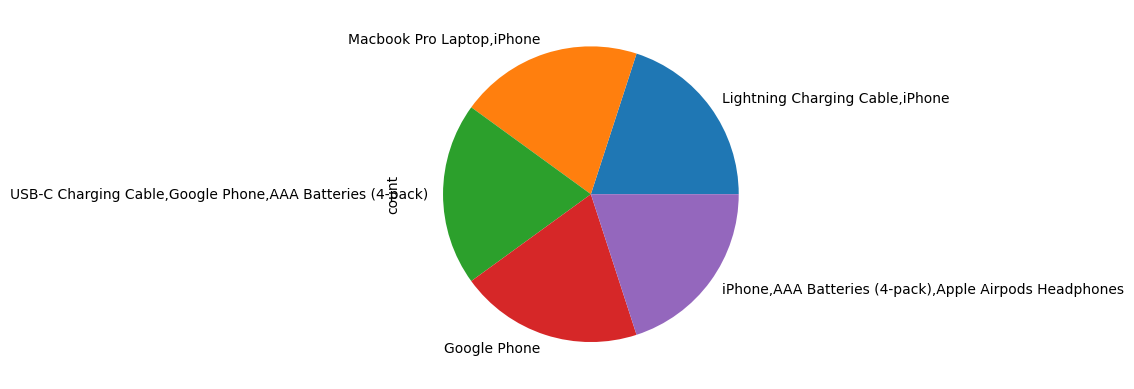

In [32]:
#Les R premières combinaisons les plus achetés

df3['Grouped'].value_counts()[0:5].plot.pie()